In [1]:
import os
import cv2
import shutil

In [2]:
# Origial folder location
data_scr_dir = '/content/drive/MyDrive/Flatiron/Phase 5/Data'


data_dst_folder = '/content/data'


# copy folder from location to local storage

shutil.copytree(data_scr_dir, data_dst_folder)

'/content/data'

In [3]:
pip install pillow umap-learn pandas matplotlib datashader bokeh holoviews scikit-image colorcet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82813 sha256=3d8656f9014b36e3103ccc8931926cc7c1a876896b473ffcbdd8a437c4a539a8
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55621 sha256=3acd0c0ccee7bca53445f79f70fd18a913ccf3732e95be2382e2a31411753075
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
  Created wheel for dat

In [4]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import umap
import umap.plot
import pandas as pd

In [5]:
# Function to resize images to a specific shape
def resize_image(image_path, target_shape=(10, 10)):
    image = Image.open(image_path)
    image = image.resize(target_shape, Image.ANTIALIAS)
    return image


In [6]:
# Load and preprocess images from the data folders
data_folder = '/content/data'
class_folders = os.listdir(data_folder)

target_shape = (10, 10)  # Set your desired target shape

image_paths = []
labels = []

for class_label, class_name in enumerate(class_folders):
    class_path = os.path.join(data_folder, class_name)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = resize_image(image_path, target_shape)
        image_array = np.array(image)
        image_paths.append(image_array)
        labels.append(class_label)


<ipython-input-5-ecb5ad8ba440>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(target_shape, Image.ANTIALIAS)


In [7]:
# Convert the list of image arrays to a numpy array
image_data = np.array(image_paths)

# Flatten the images (convert 3D images to 2D)
n_samples, width, height, channels = image_data.shape
image_data = image_data.reshape((n_samples, width * height * channels))



In [8]:
im = {0: 'ModerateDemented', 1: 'NonDemented', 2:'MildDemented', 3: 'VeryMildDemented'}
converted_list = [im[num] for num in labels]
img_labels = np.array(converted_list)


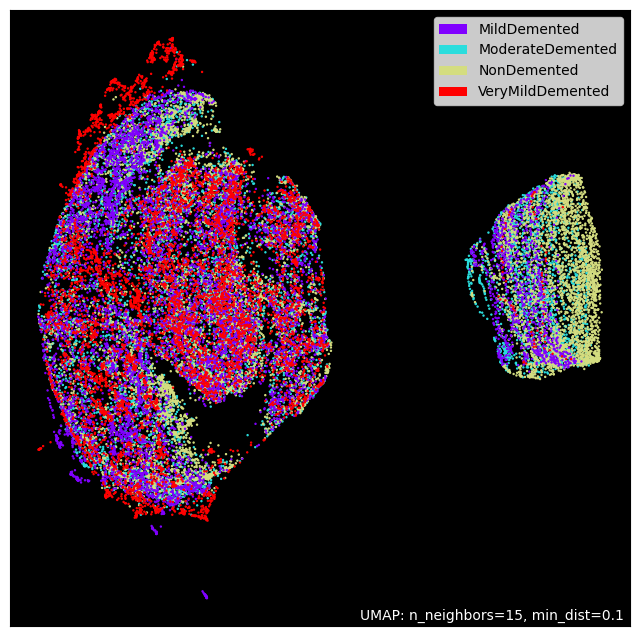

In [12]:
embedding = umap.UMAP().fit(image_data)
from bokeh.plotting import figure

p = umap.plot.points(embedding, labels=img_labels,theme='fire')